# Weather Correlation Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = (10,8)

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)


In [ ]:
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'] , format='%Y-%m')

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

# Now, complete the following tasks :

## First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

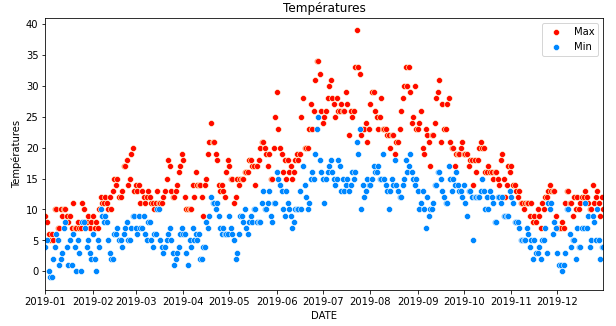


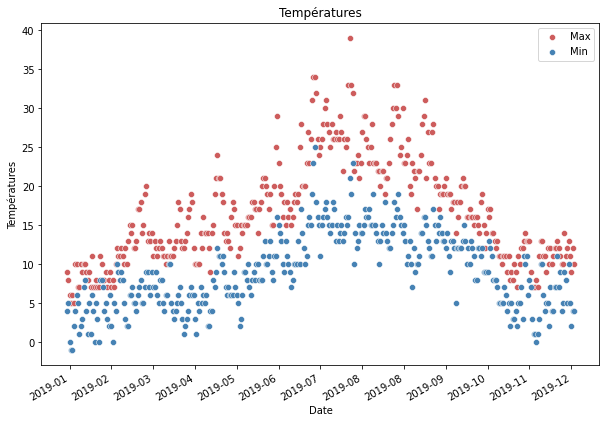

In [ ]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(10,7))

# Graphique nuages de points
sns.scatterplot(
    data=df_weather, 
    x="DATE", 
    y="MAX_TEMPERATURE_C",
    sizes=(20, 200), 
    color='indianred',
    label="Max",
    legend=True)

sns.scatterplot(
    data=df_weather, 
    x="DATE", 
    y="MIN_TEMPERATURE_C",
    sizes=(20, 200), 
    color= 'steelblue',
    label="Min",
    legend=True)

ax.set(xlabel="Date",
      ylabel="Températures",
      title="Températures")

# Echelle abscisse
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
# autofit
plt.gcf().autofmt_xdate()

fig.show()

## Colorize with hue argument, to show the criterias of the opinion columns

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

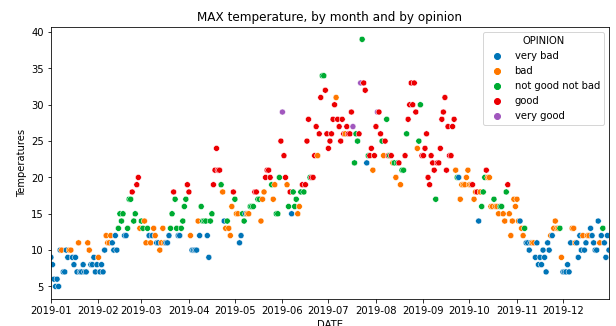

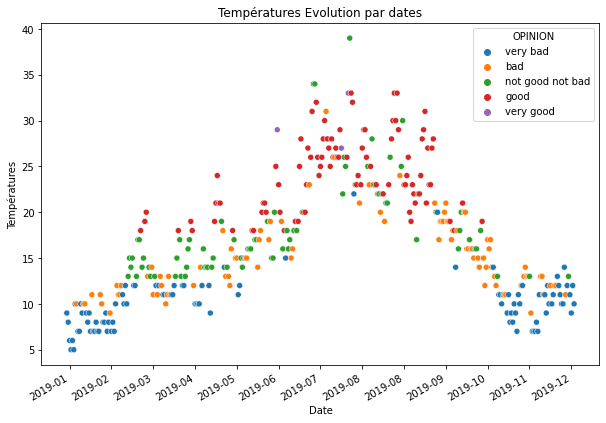

In [ ]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

# Taille de l'affichage
fig, ax = plt.subplots(figsize=(10,7))

# ------------------ Scatter Plot ------------------#

# Graphique nuage de points
sns.scatterplot(data=df_weather, 
                x=df_weather["DATE"], 
                y=df_weather["MAX_TEMPERATURE_C"], 
                hue=df_weather["OPINION"]
                ).set(
                    xlabel = "Date", 
                    ylabel = "Températures",
                    title = "Températures Evolution par dates")

# Echelle abscisse
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
# autofit
plt.gcf().autofmt_xdate()

# Afficher graph
fig.show()


## Correlation coefficient and heatmap - change the palette and interpretation

For more information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/





What does it mean ? Could you interpret this ? 

Why the diagonal value is `1` ? <font color='green'>**Correlation with the same value category. max temp with max temp and so on.**</font>

And why there is a blank column and a blank row ? <font color='green'>**No snow values**</font>

Could you find the less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1.
<font color='green'>**UV index with wind speed max, day and month, visiblity and temp ...**</font>

Let's modify it to be more readable.
Please change the palette (`cmap`) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html and `center` it on 0.



Here is an example of what is expected (but you can improve colors) :

![ ](https://storage.googleapis.com/quest_editor_uploads/Ci9AZJdBsnuTx7z8XuZRTbvoCi3uON5r.png)

Then, please add a title of course.

Try to interpret it : which columns are most correlated with MAX Temperature ? 
<font color='green'>**Correlated columns are the ones with temperature's values.**</font>
Positively and negatively ? Do you think it's logical ?

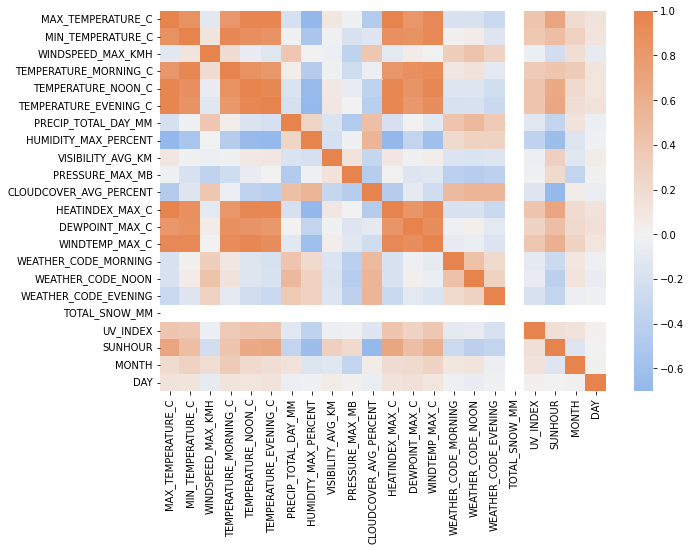

In [ ]:
# It's your turn now :
fig, ax = plt.subplots(figsize=(10,7))
color_pal_1 = sns.diverging_palette(250, 30, l=65, center="light", as_cmap=True)
color_pal_2 = sns.color_palette("Spectral", as_cmap=True)
ax = sns.heatmap(df_weather.corr(), center=0, cmap=color_pal_1)


## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot. But it's slow to compute on the whole dataset.

- Creates a slice of 10 columns (including the "OPINION" column)
- Creates a sample of this slice
- Draw a Pairplot on this sample, and colorize it by `OPINION`

In [ ]:
print(df_weather.columns)

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR', 'OPINION', 'MONTH', 'DAY'],
      dtype='object')


In [ ]:
# It's your turn:
pairplot_select = df_weather.iloc[:, [1, 2, 3, 4, 5, 6, 11, 13, 21, 22]]
# pairplot_select.head()

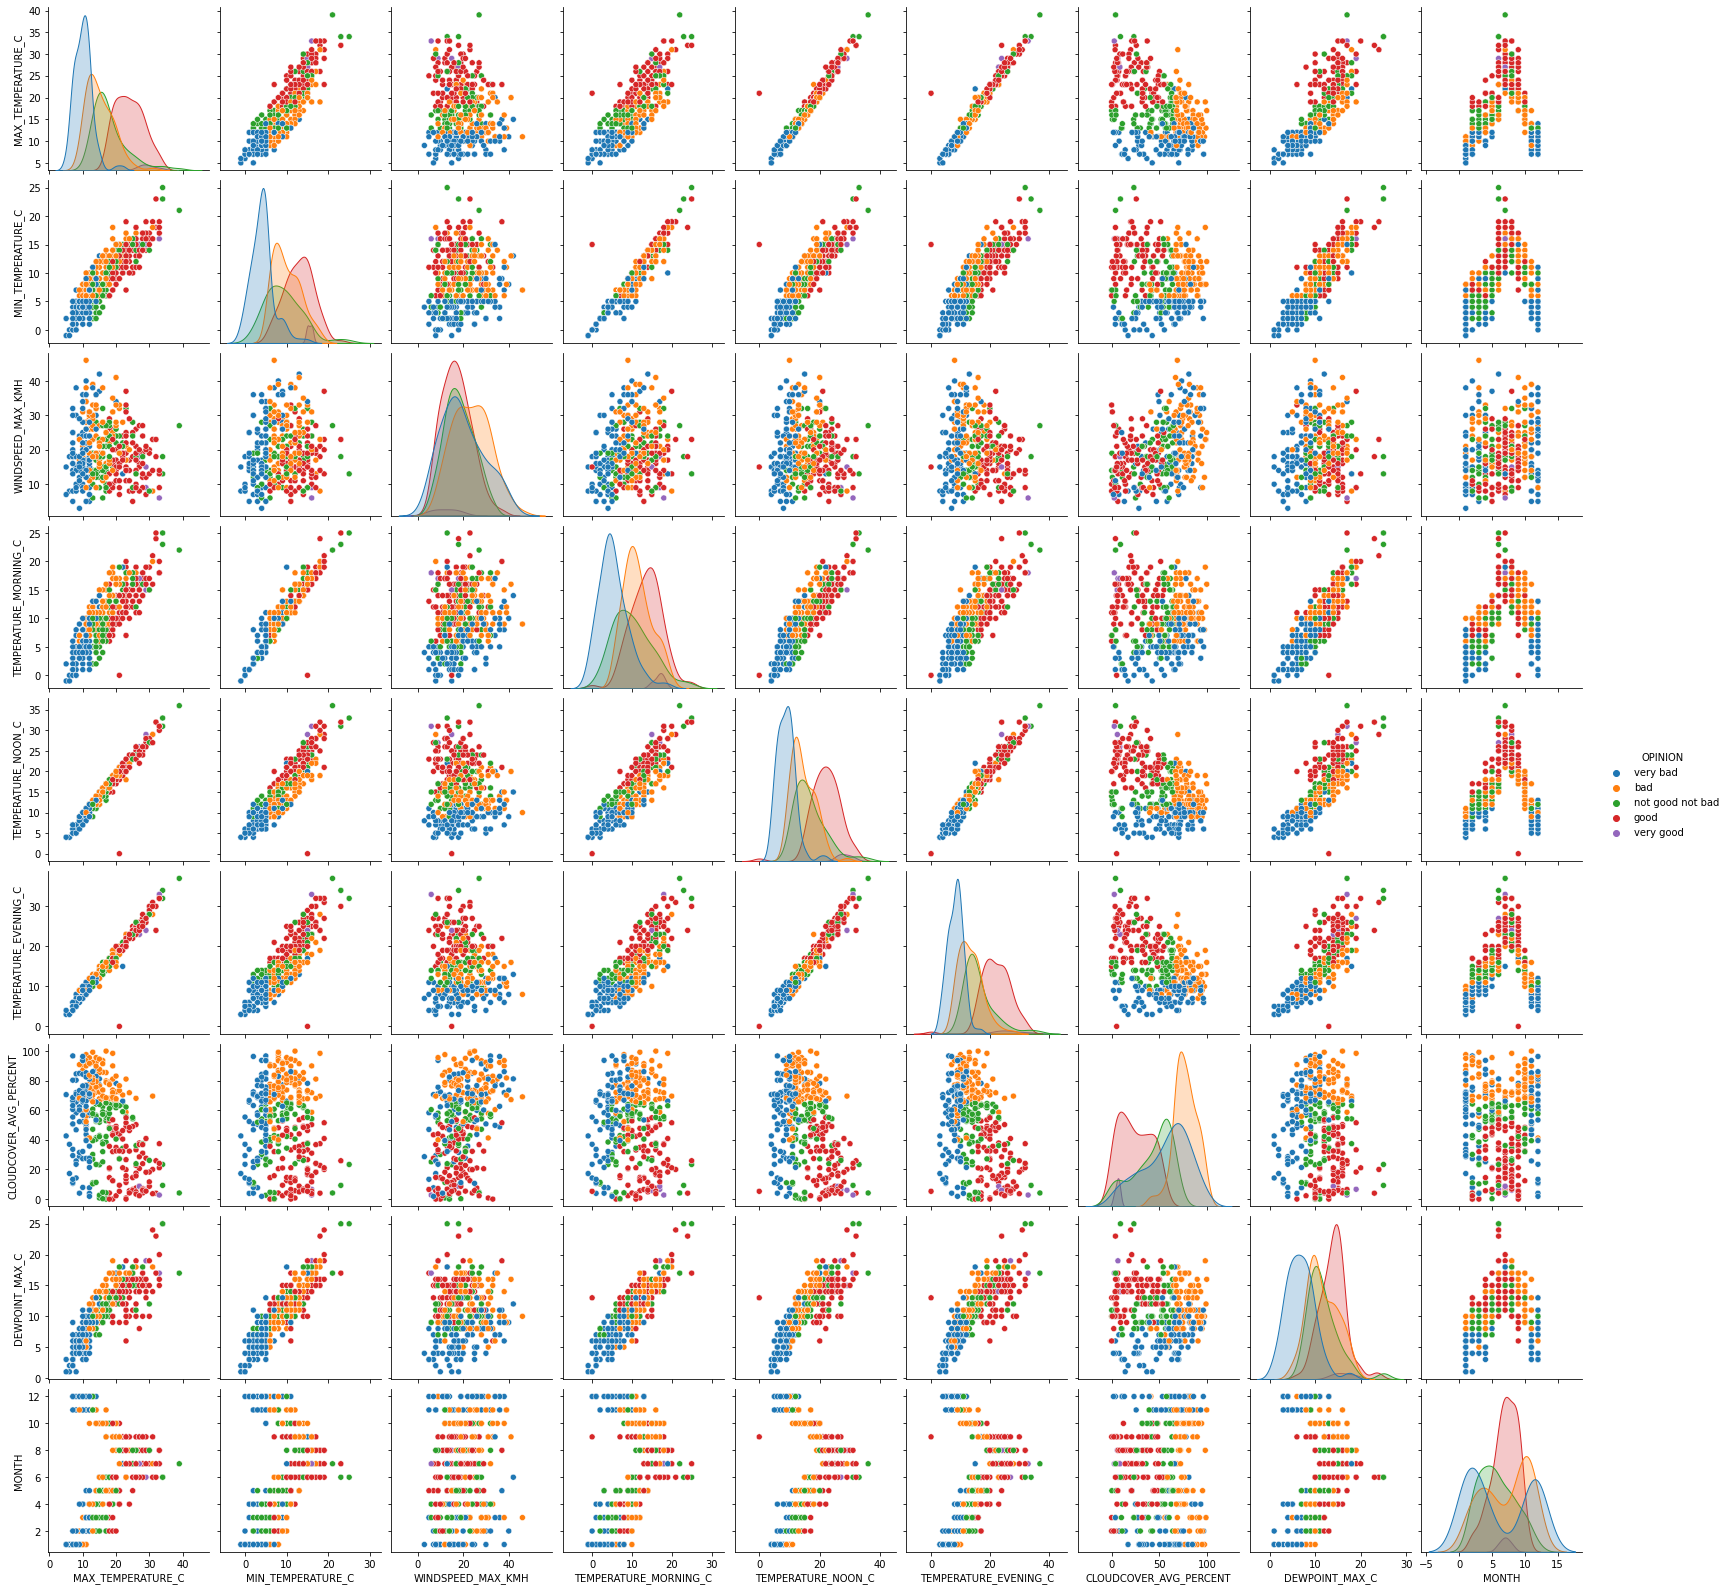

In [ ]:
# pairplot
sns.pairplot(pairplot_select, hue="OPINION")
plt.show()

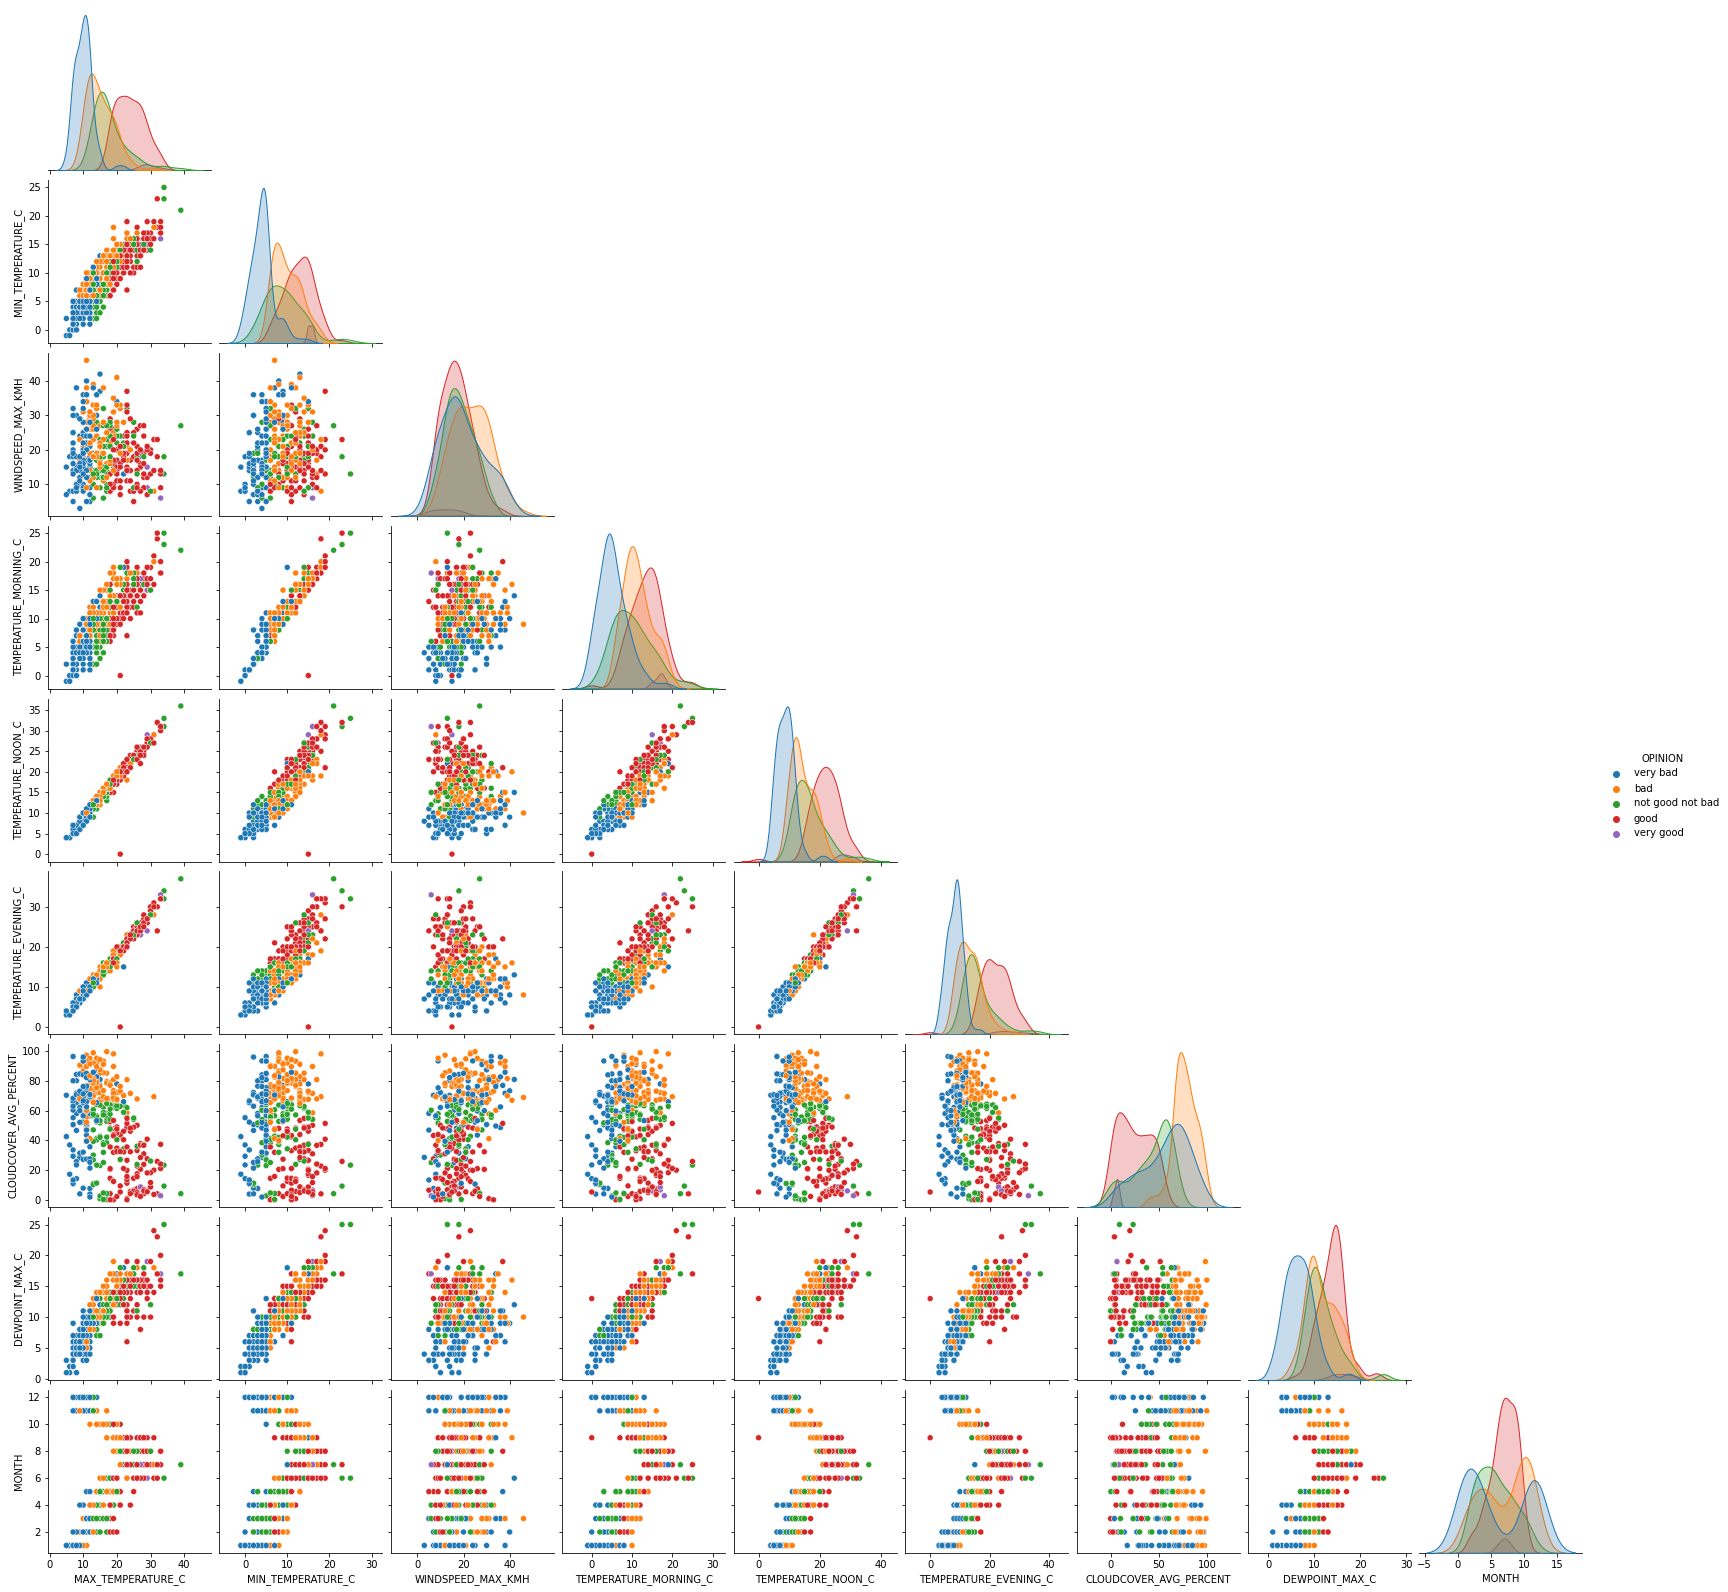

In [ ]:
# pairplot
sns.pairplot(pairplot_select, hue="OPINION", corner=True)
plt.show()

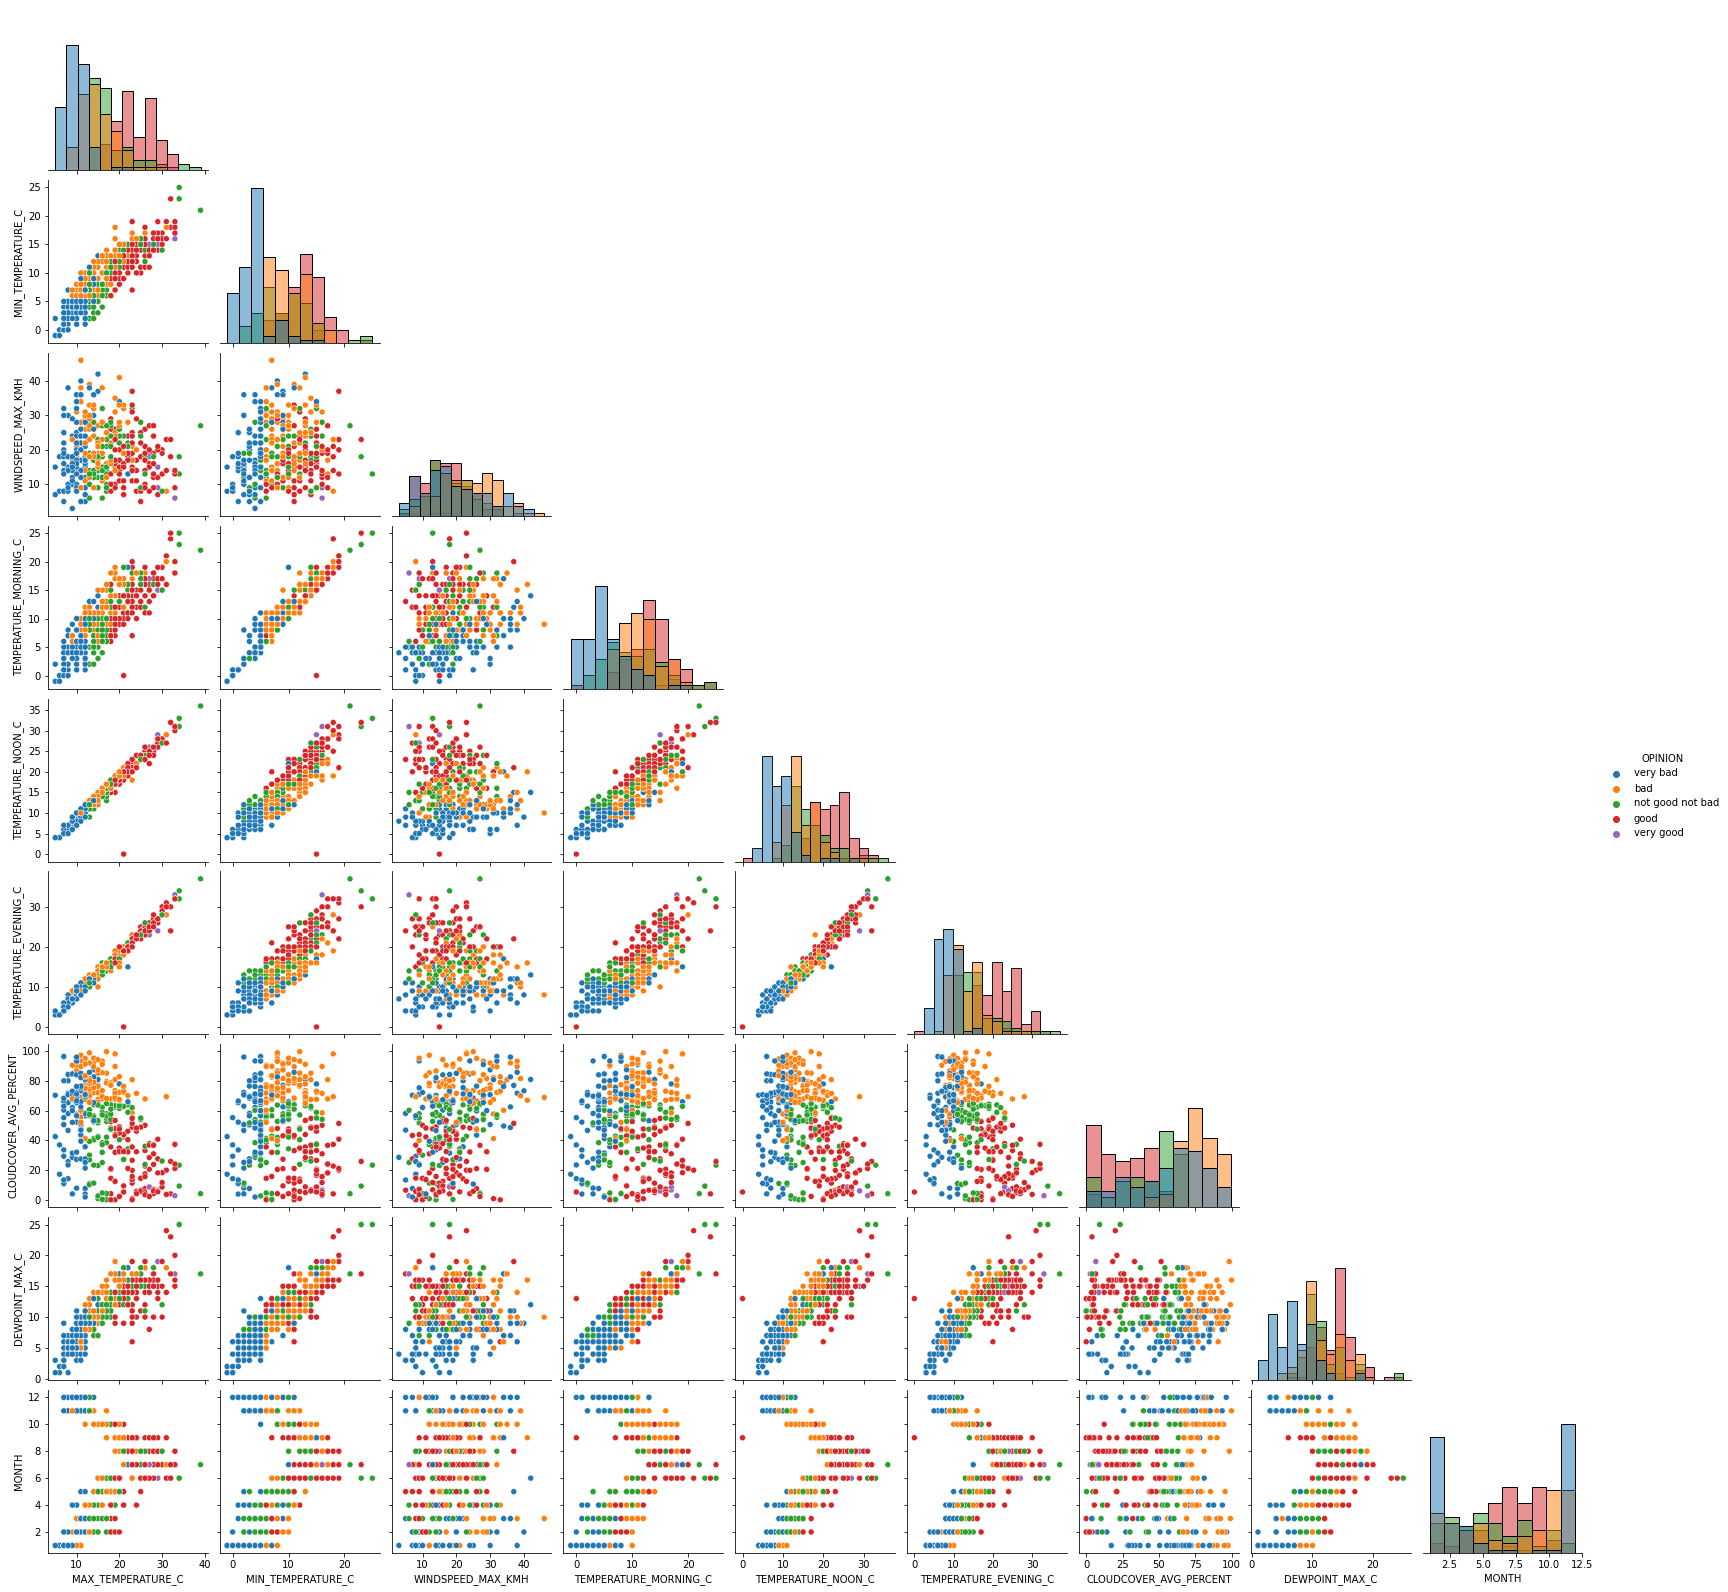

In [ ]:
# pairplot
sns.pairplot(pairplot_select, hue="OPINION", corner=True, diag_kind="hist")
plt.show()

## Linear regression

With `regplot`, you can plot a regresion line. It's very simple, but here, it's not very adapted, because our 2 columns seems not correlated. But you know lots of correlated columns with MAX Temperature.
Replace the X-axis with a positively correlated columns, then plot another regplot with a negative correlation.

In [ ]:
print(df_weather.columns)

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR', 'OPINION', 'MONTH', 'DAY'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


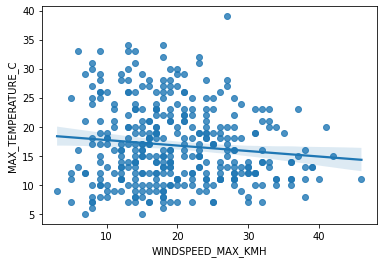

In [ ]:

sns.regplot('WINDSPEED_MAX_KMH', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


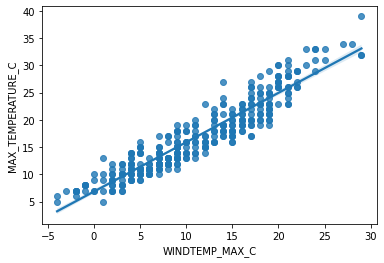

In [ ]:
# Display a regplot with a positive correlation:
sns.regplot('WINDTEMP_MAX_C', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


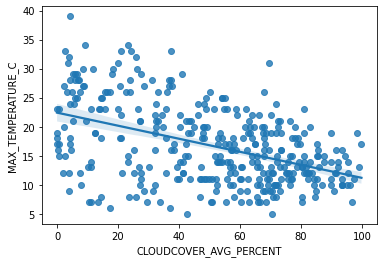

In [ ]:
# Display a regplot with a negative correlation:
sns.regplot('CLOUDCOVER_AVG_PERCENT', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()

# More and more...
Draw 4 different charts of your choice on the same dashboard. You're an analyst, you have to be force of proposal. Your goal here is to represent which season has the best weather.

Remember, a MatPlotLib "figure" is like a dashboard including subplots. So you have to create a MatPlotLib figure with subplots. And these subplots will be Seaborn's charts.

In [ ]:
# Préparation des données
df_weather['nom_mois'] = df_weather['DATE'].dt.month_name().str[:3]
df_weather = df_weather.sort_values(by="MONTH")

In [ ]:
# Moyenne des temp Max et Min par mois
moy_temp_Min_Max = df_weather.groupby(["nom_mois", "MONTH"])["MAX_TEMPERATURE_C", "MIN_TEMPERATURE_C"].mean().round().reset_index().rename(columns={"MAX_TEMPERATURE_C":'moy_max_temp', "MIN_TEMPERATURE_C":'moy_min_temp'}).sort_values(by="MONTH")
moy_temp_Min_Max.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,nom_mois,MONTH,moy_max_temp,moy_min_temp
4,Jan,1,8.0,4.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


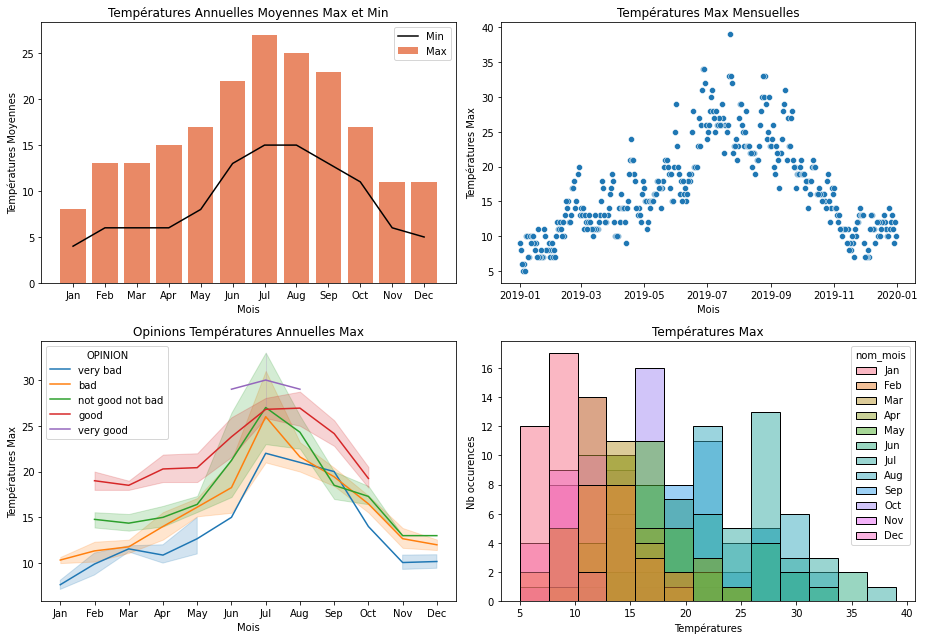

In [ ]:
# Your code here
plt.subplots(figsize=(13,9)) 

plt.subplot(2,2,1)

x = moy_temp_Min_Max.nom_mois

sns.barplot(data=moy_temp_Min_Max, 
            x=moy_temp_Min_Max.nom_mois, 
            y=moy_temp_Min_Max.moy_max_temp, 
            color = 'coral',
            label="Max") 
sns.lineplot(data=moy_temp_Min_Max, 
             x=moy_temp_Min_Max.nom_mois, 
             y=moy_temp_Min_Max.moy_min_temp, 
             color = 'black',
             label="Min",
             legend=True)

plt.title('Températures Annuelles Moyennes Max et Min', fontsize=12)
plt.xlabel('Mois') 
plt.ylabel('Températures Moyennes', color = 'black') 

plt.subplot(2,2,2)
sns.scatterplot('DATE', 'MAX_TEMPERATURE_C', data = df_weather)
plt.title('Températures Max Mensuelles', fontsize=12)
plt.xlabel('Mois') 
plt.ylabel('Températures Max', color = 'black') 

plt.subplot(2,2,3)
sns.lineplot(x="nom_mois", y="MAX_TEMPERATURE_C", hue="OPINION", data=df_weather)
plt.title('Opinions Températures Annuelles Max', fontsize=12)
plt.xlabel('Mois') 
plt.ylabel('Températures Max', color = 'black') 

plt.subplot(2,2,4)
sns.histplot(hue="nom_mois", x="MAX_TEMPERATURE_C", data=df_weather, stat="count", log_scale=False)
plt.title('Températures Max', fontsize=12)
plt.xlabel('Températures') 
plt.ylabel('Nb occurences', color = 'black') 

plt.tight_layout()

plt.show()


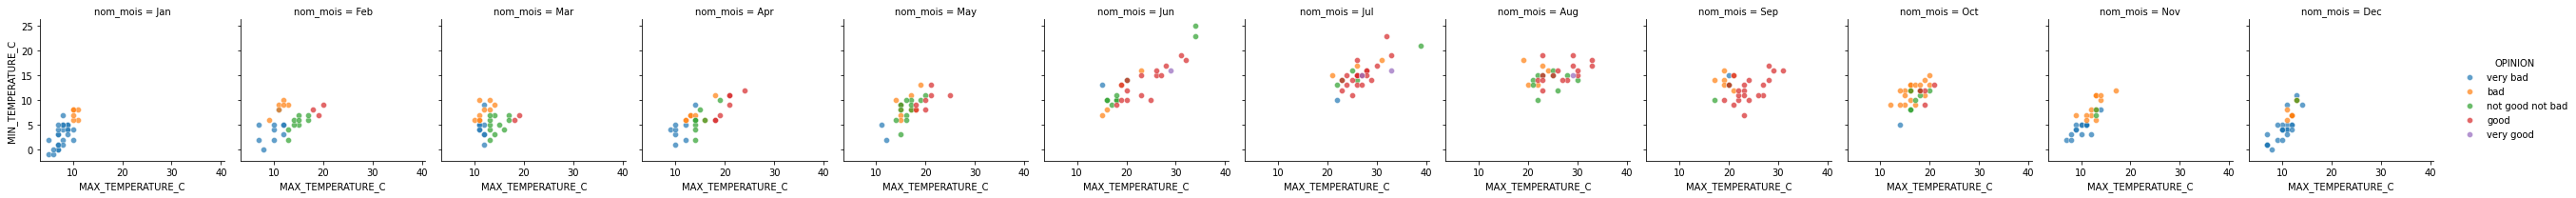

In [ ]:
g = sns.FacetGrid(df_weather, col="nom_mois", hue="OPINION")
g.map(sns.scatterplot, "MAX_TEMPERATURE_C", "MIN_TEMPERATURE_C", alpha=.7)
g.add_legend()


 # Is it summer? It seems appropriate. :) ----> Yes !